In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow import keras
from keras import layers
import matplotlib.image as img

%matplotlib inline

In [2]:
!pip install split-folders
import splitfolders
splitfolders.ratio('../input/tyre-condition-prediction', output="output", seed=1337, ratio=(.8, 0.1,0.1)) 
# (train:val:test)

Copying files: 502 files [00:06, 77.64 files/s] 


In [3]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/train",
seed=123,
image_size=(128, 128),
batch_size=64
)
# seed: to initialize the random number generator'
# batch_size: number of samples processed before the model is updated

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/test",
seed=123,
image_size=(128, 128),
batch_size=64
)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
"./output/val",
seed=123,
image_size=(128, 128),
batch_size=64
)

Found 401 files belonging to 3 classes.


2022-06-12 19:11:26.567356: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


Found 52 files belonging to 3 classes.
Found 49 files belonging to 3 classes.


In [4]:
class_names = train_ds.class_names
print(class_names)

['class_1', 'class_2', 'class_3']


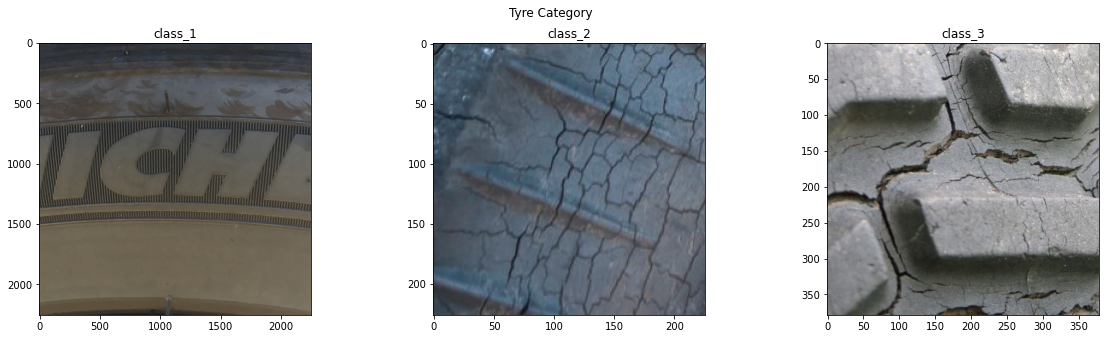

In [5]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))
fig.suptitle('Tyre Category')
class_1_img = img.imread('../input/tyre-condition-prediction/class_1/NewNormal100.jpg')
class_2_img = img.imread('../input/tyre-condition-prediction/class_2/Cracked-103.jpg')
class_3_img = img.imread('../input/tyre-condition-prediction/class_3/Cracked-10.jpg')

ax[0].set_title('class_1')
ax[1].set_title('class_2')
ax[2].set_title('class_3')

ax[0].imshow(class_1_img)
ax[1].imshow(class_2_img)
ax[2].imshow(class_3_img)

In [6]:
model = keras.models.Sequential()
# The sequential API allows you to create models layer-by-layer for most problems.
model.add(keras.layers.experimental.preprocessing.Rescaling(1./255))
model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3), input_shape=(128,128,1),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.20))

model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.25))



model.add(keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',kernel_initializer="he_normal"))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.BatchNormalization())

model.add(keras.layers.Dropout(0.25))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation="relu",kernel_initializer="he_normal"))
model.add(keras.layers.Dense(30,"softmax"))
model.add(keras.layers.Dense(5,"softmax"))

In [7]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = "RMSprop",metrics=["accuracy"])

In [8]:
hist = model.fit(train_ds,validation_data=val_ds,epochs=50, batch_size=64, verbose=1)

Epoch 1/50


2022-06-12 19:11:30.060939: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


7/7 [==============================] - 17s 1s/step - loss: 1.5080 - accuracy: 0.5436 - val_loss: 1.5437 - val_accuracy: 0.7755
Epoch 2/50
7/7 [==============================] - 12s 1s/step - loss: 1.3681 - accuracy: 0.7357 - val_loss: 1.4692 - val_accuracy: 0.7551
Epoch 3/50
7/7 [==============================] - 11s 1s/step - loss: 1.3187 - accuracy: 0.7382 - val_loss: 1.4227 - val_accuracy: 0.7551
Epoch 4/50
7/7 [==============================] - 11s 984ms/step - loss: 1.2953 - accuracy: 0.7382 - val_loss: 1.3696 - val_accuracy: 0.7551
Epoch 5/50
7/7 [==============================] - 11s 1s/step - loss: 1.2720 - accuracy: 0.7382 - val_loss: 1.3137 - val_accuracy: 0.7551
Epoch 6/50
7/7 [==============================] - 11s 976ms/step - loss: 1.2599 - accuracy: 0.7382 - val_loss: 1.2960 - val_accuracy: 0.7551
Epoch 7/50
7/7 [==============================] - 11s 969ms/step - loss: 1.2437 - accuracy: 0.7382 - val_loss: 1.2645 - val_accuracy: 0.7551
Epoch 8/50
7/7 [====================

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling (Rescaling)        (None, 128, 128, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 126, 126, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 63, 63, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 30, 30, 64)        2

In [10]:
get_ac = hist.history['accuracy']
get_los = hist.history['loss']
val_acc = hist.history['val_accuracy']
val_loss = hist.history['val_loss']

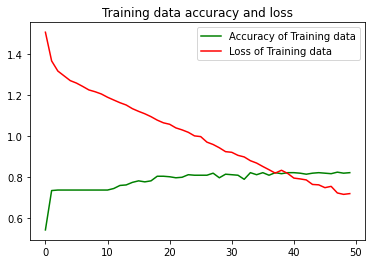

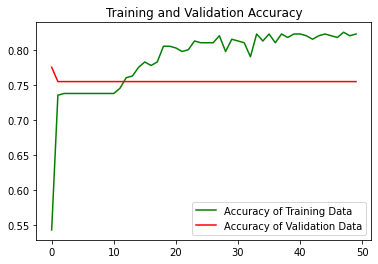

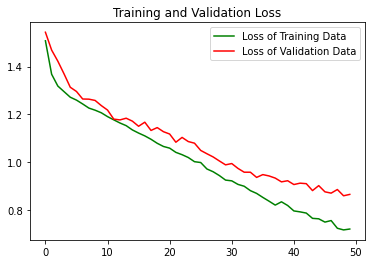

<Figure size 432x288 with 0 Axes>

In [11]:
epochs = range(len(get_ac))
plt.plot(epochs, get_ac, 'g', label='Accuracy of Training data')
plt.plot(epochs, get_los, 'r', label='Loss of Training data')
plt.title('Training data accuracy and loss')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_ac, 'g', label='Accuracy of Training Data')
plt.plot(epochs, val_acc, 'r', label='Accuracy of Validation Data')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs, get_los, 'g', label='Loss of Training Data')
plt.plot(epochs, val_loss, 'r', label='Loss of Validation Data')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()


In [12]:
loss, accuracy = model.evaluate(test_ds)

1/1 [==============================] - 1s 668ms/step - loss: 0.8965 - accuracy: 0.7115


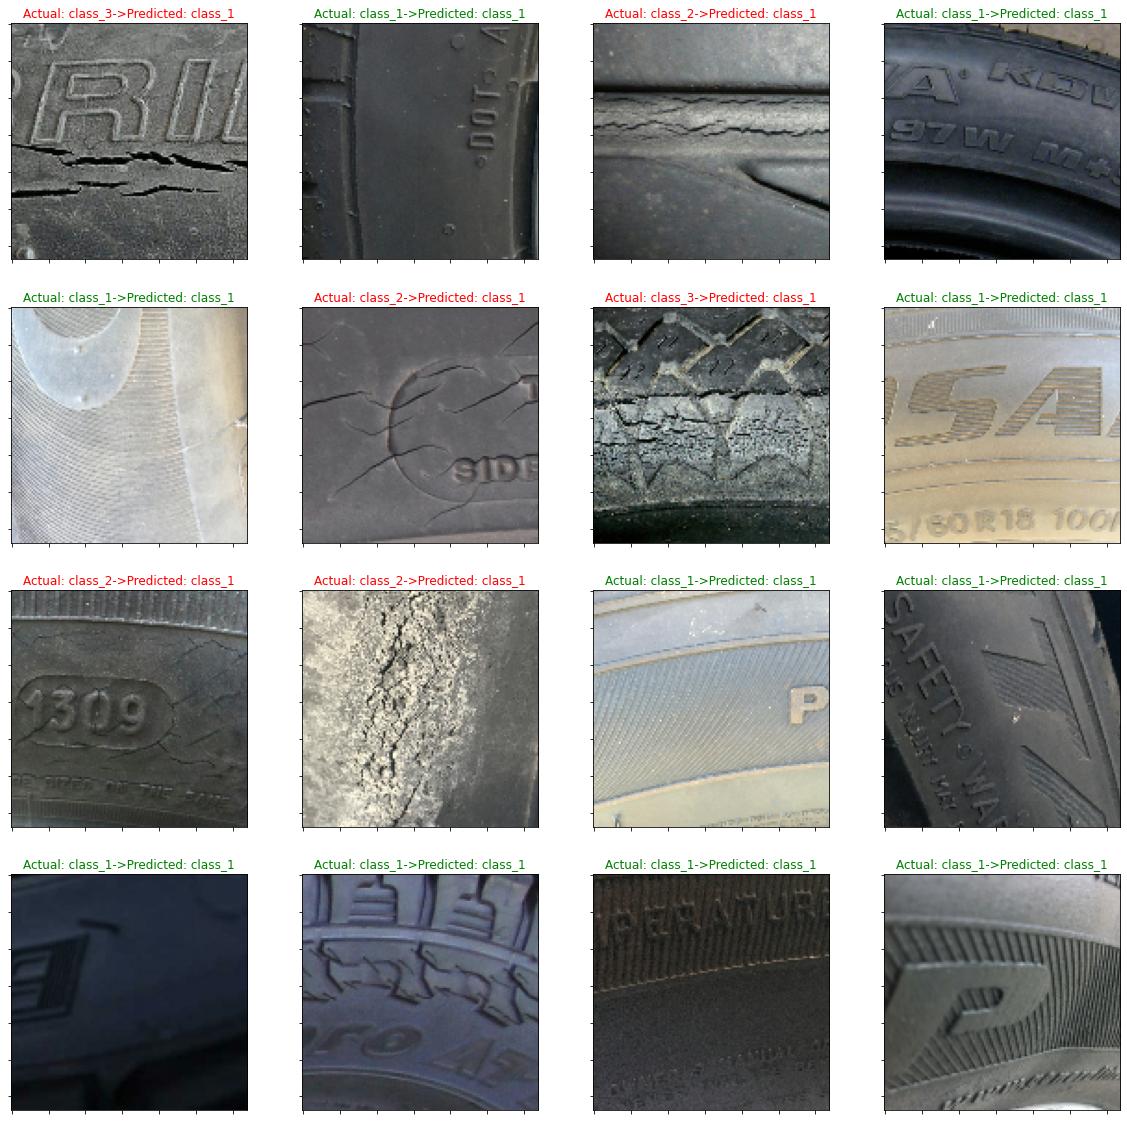

In [13]:
plt.figure(figsize=(20, 20))
for images, labels in test_ds.take(1):
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predictions = model.predict(tf.expand_dims(images[i], 0))
        score = tf.nn.softmax(predictions[0])
        if(class_names[labels[i]]==class_names[np.argmax(score)]):
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'green'})
            
        else:
            plt.title("Actual: "+class_names[labels[i]]+"->Predicted: "+class_names[np.argmax(score)],fontdict={'color':'red'})
        plt.gca().axes.yaxis.set_ticklabels([])        
        plt.gca().axes.xaxis.set_ticklabels([])